In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from curvemetrics.src.classes.datafetcher import DataFetcher
from curvemetrics.src.classes.datahandler import DataHandler
from datetime import datetime
import argparse
import asyncio
import os
import json
from web3 import Web3
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
STEP_SIZE = 10 # NOTE: increasing this risks losing txs, 10 is probably safe
INFURA_KEY = os.getenv("INFURA_KEY")
def load_config():
    # Load the configuration
    with open(os.path.join(os.path.abspath('config.json')), "r") as config_file:
        config = json.load(config_file)
    return config

datahandler = DataHandler()
token_metadata = datahandler.get_token_metadata()

datafetcher = DataFetcher(token_metadata=token_metadata)

In [5]:
token = "0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48"
chainlink_address = Web3.to_checksum_address("0x8fffffd4afb6115b954bd326cbe7b4ba576818f6")
abi = abi = '[{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"description","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint80","name":"_roundId","type":"uint80"}],"name":"getRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"version","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}]'
client = Web3(Web3.HTTPProvider(f"https://mainnet.infura.io/v3/{INFURA_KEY}"))
contract = client.eth.contract(address=chainlink_address, abi=abi)

In [6]:
start_timestamp = datetime.timestamp(datetime(2023, 3, 9))
end_timestamp = datetime.timestamp(datetime(2023, 3, 15))

In [8]:
ohlcv = datafetcher.get_chainlink_prices(token, chainlink_address, start_timestamp, end_timestamp)
ohlcv = DataHandler.format_token_data(ohlcv)
ohlcv.index = pd.to_datetime(ohlcv['timestamp'], unit='s')
ohlcv

Found the closest round: 36893488147419104086, at 2023-03-08 06:00:23.
Number of iterations: 10


,token_id,symbol,timestamp,open,high,low,close,volume
timestamp,,,,,,,,
2023-03-08 06:00:23,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678255223,None,None,None,0.999964,None
2023-03-09 06:00:35,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678341635,None,None,None,1.000000,None
2023-03-10 06:00:59,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678428059,None,None,None,1.000190,None
2023-03-10 22:27:35,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678487255,None,None,None,0.997559,None
2023-03-11 00:38:11,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678495091,None,None,None,0.995035,None
...,...,...,...,...,...,...,...,...
2023-03-13 15:55:47,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678722947,None,None,None,0.998300,None
2023-03-13 16:08:11,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678723691,None,None,None,0.995800,None
2023-03-13 16:13:11,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678723991,None,None,None,0.998874,None


<Axes: xlabel='timestamp'>

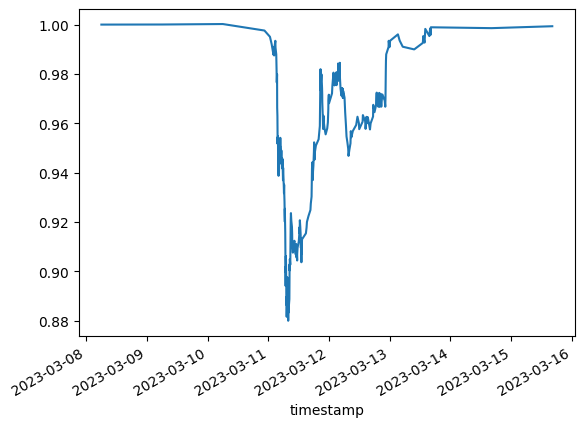

In [10]:
usdc = '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48'
ccxt_ohlcv = datahandler.get_ohlcv_data(token, start=start_timestamp, end=end_timestamp)

<Axes: xlabel='timestamp'>

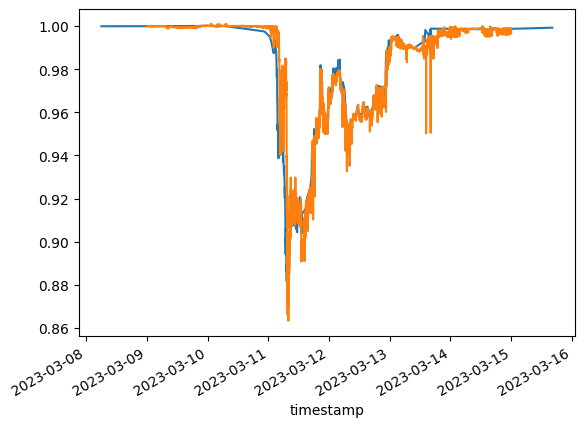

In [13]:
ohlcv['close'].plot()
ccxt_ohlcv['close'].plot()

In [16]:
ohlcv.loc['2023-03-11']

,token_id,symbol,timestamp,open,high,low,close,volume
timestamp,,,,,,,,
2023-03-11 00:38:11,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678495091,None,None,None,0.995035,None
2023-03-11 01:18:11,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678497491,None,None,None,0.992092,None
2023-03-11 01:54:47,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678499687,None,None,None,0.988432,None
2023-03-11 01:55:47,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678499747,None,None,None,0.990909,None
2023-03-11 01:59:11,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678499951,None,None,None,0.987782,None
...,...,...,...,...,...,...,...,...
2023-03-11 23:36:35,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678577795,None,None,None,0.962898,None
2023-03-11 23:42:35,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678578155,None,None,None,0.965852,None
2023-03-11 23:43:59,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678578239,None,None,None,0.969100,None


In [ ]:
# start = datetime.timestamp(datetime(2022, 5, 1))
start = 1649264925
end = datetime.timestamp(datetime(2022, 5, 20))
config = load_config()
ust = "0xa693b19d2931d498c5b318df961919bb4aee87a5"
addy = "0x8b6d9085f310396C6E4f0012783E9f850eaa8a82"
# token_data = datafetcher.get_chainlink_prices(ust, addy, start, end)
# df = DataHandler.format_token_data(token_data)
# df.to_csv("./temp_ust_data.csv")
df = pd.read_csv("./temp_ust_data.csv", index_col=0)
df.index = df['timestamp'].apply(datetime.fromtimestamp)
df.head()

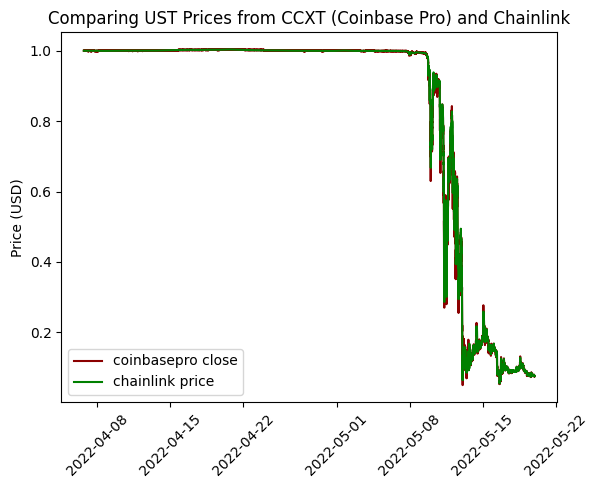

In [85]:
f, ax = plt.subplots()

ax.plot(ohlcv.index, ohlcv["close"], label="coinbasepro close", c='darkred')
ax.plot(df.index, df["close"], label="chainlink price", c='green')
ax.set_ylabel("Price (USD)")
ax.tick_params(axis='x', rotation=45)
ax.legend()
ax.set_title("Comparing UST Prices from CCXT (Coinbase Pro) and Chainlink")
f.savefig('./figs/ust_prices.png')
f.show()

In [9]:
# start = datetime.timestamp(datetime(2022, 11, 1))
start = 1635284389
end = datetime.timestamp(datetime(2023, 2, 1))

config = load_config()
addy = "0x099c9588D8C6F7579C89014e59002881CE0c46A1"
usdn = "0x674C6Ad92Fd080e4004b2312b45f796a192D27a0"

usdn_data = datafetcher.get_chainlink_prices(usdn, addy, start, end)
df = DataHandler.format_token_data(usdn_data)
df.to_csv("./temp_usdn_data.csv")
df.index = df['timestamp'].apply(datetime.fromtimestamp)
df.head()

,token_id,symbol,timestamp,open,high,low,close,volume
timestamp,,,,,,,,
2021-10-26 21:39:49,0x674C6Ad92Fd080e4004b2312b45f796a192D27a0,USDN/USD,1635284389,None,None,None,0.984042,None
2021-10-27 21:26:31,0x674C6Ad92Fd080e4004b2312b45f796a192D27a0,USDN/USD,1635369991,None,None,None,0.980980,None
2021-10-28 21:10:43,0x674C6Ad92Fd080e4004b2312b45f796a192D27a0,USDN/USD,1635455443,None,None,None,0.972400,None
2021-10-29 20:54:38,0x674C6Ad92Fd080e4004b2312b45f796a192D27a0,USDN/USD,1635540878,None,None,None,0.961537,None
2021-10-30 20:38:34,0x674C6Ad92Fd080e4004b2312b45f796a192D27a0,USDN/USD,1635626314,None,None,None,0.967406,None


<Axes: xlabel='timestamp'>

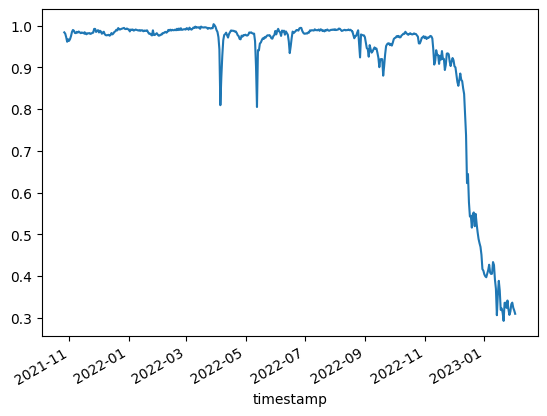

In [10]:
df['close'].plot()

In [6]:
chainlink_address = Web3.to_checksum_address("0x099c9588D8C6F7579C89014e59002881CE0c46A1")
abi = abi = '[{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"description","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint80","name":"_roundId","type":"uint80"}],"name":"getRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"version","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}]'
client = Web3(Web3.HTTPProvider(f"https://mainnet.infura.io/v3/{INFURA_KEY}"))
contract = client.eth.contract(address=chainlink_address, abi=abi)
symbol = contract.functions.description().call().replace(" ", "")

In [8]:
contract.functions.getRoundData(1).call()

[1, 98404225, 1635284389, 1635284389, 1]

In [26]:
datetime.fromtimestamp(1675776755)

datetime.datetime(2023, 2, 7, 13, 32, 35)

In [29]:
512 >> 64

0

In [50]:
res = contract.functions.getRoundData(376).call()
print(res)
print(datetime.fromtimestamp(res[3]))

[376, 96807200, 1664501879, 1664501879, 376]
2022-09-30 01:37:59


In [43]:
contract.functions.decimals().call()

8

In [13]:
usdt = '0xdac17f958d2ee523a2206206994597c13d831ec7'
usdt_ohlcv = datahandler.get_ohlcv_data(usdt, start=datetime.timestamp(datetime(2022, 1, 1)), end=datetime.timestamp(datetime(2023, 1, 1)))
usdt_ohlcv = usdt_ohlcv['close']
usdt_ohlcv.name = token_metadata[usdt]['symbol']
usdt_ohlcv.head()

timestamp
2022-01-01 00:01:00    1.0000
2022-01-01 00:02:00    1.0001
2022-01-01 00:03:00    1.0001
2022-01-01 00:04:00    0.9999
2022-01-01 00:05:00    1.0001
Freq: T, Name: USDT, dtype: float64

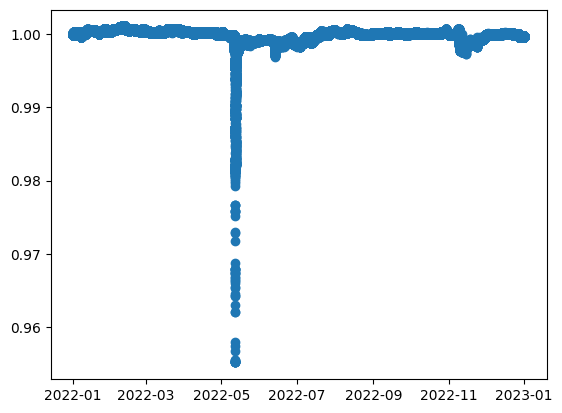

In [17]:
f, ax = plt.subplots()

ax.scatter(usdt_ohlcv.index, usdt_ohlcv)